In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize']=[10,7]

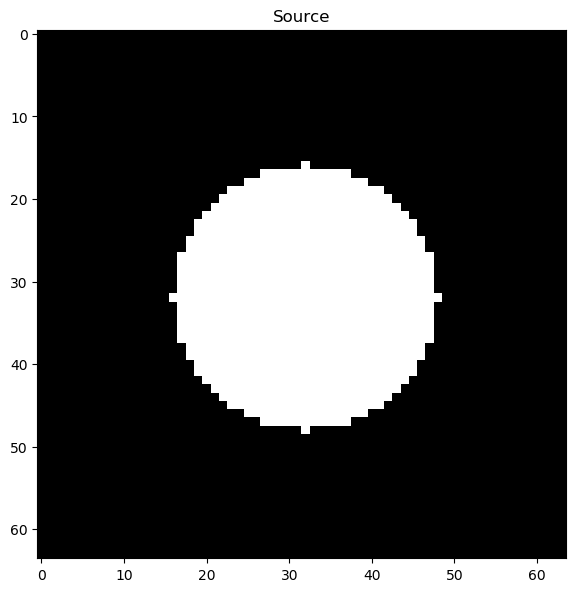

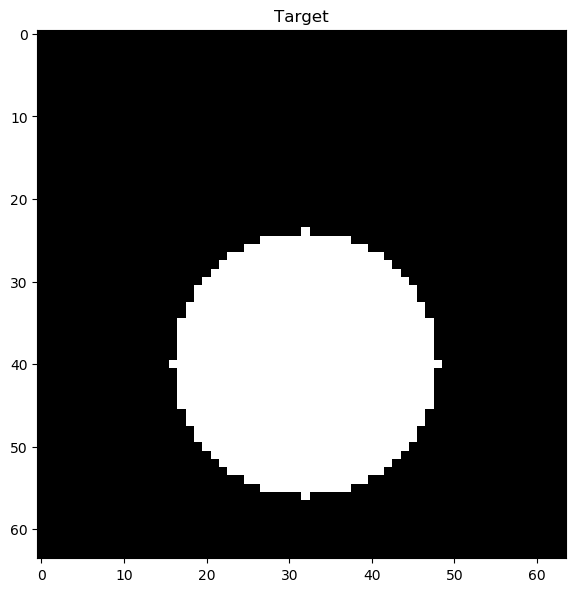

In [3]:
import lagomorph as lm
import shooting
width = 64
source = shooting.circle_image(width, width, width//2, width//2, width//4)
target = shooting.circle_image(width, width, width*5//8, width//2, width//4)
plt.imshow(source.squeeze(), cmap='gray')
plt.title('Source')
plt.figure()
plt.imshow(target.squeeze(), cmap='gray')
_=plt.title('Target')

/home/4jh/miniconda3x86_64/envs/lagomorph/lib/python3.6/site-packages/skcuda/__init__.py:4: UserWarning: Module lagomorph was already imported from /home/4jh/miniconda3x86_64/envs/lagomorph/lib/python3.6/site-packages/lagomorph/__init__.py, but /home/4jh/git/lagomorph/examples is being added to sys.path
  __import__('pkg_resources').declare_namespace(__name__)


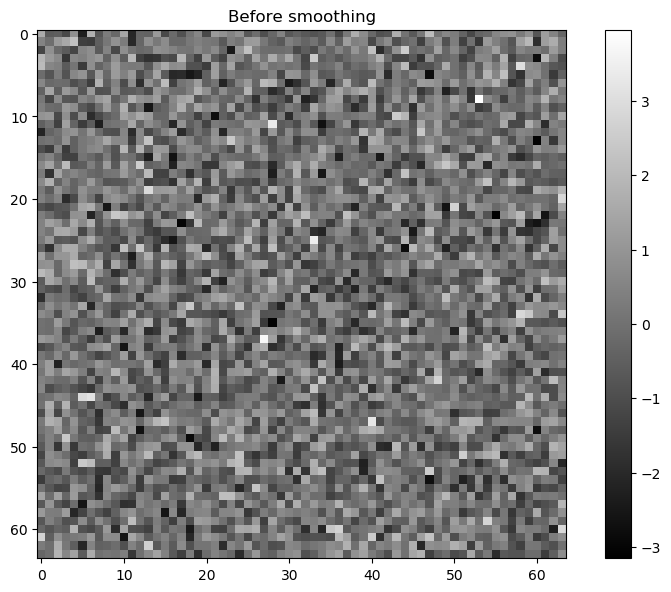

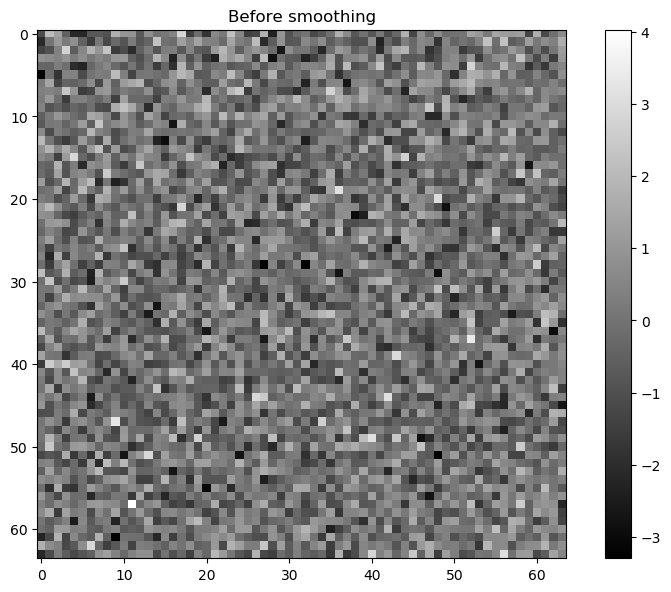

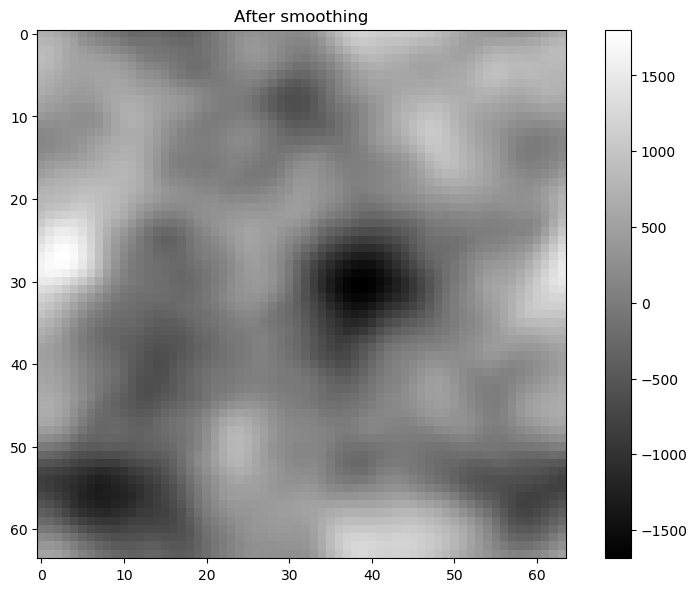

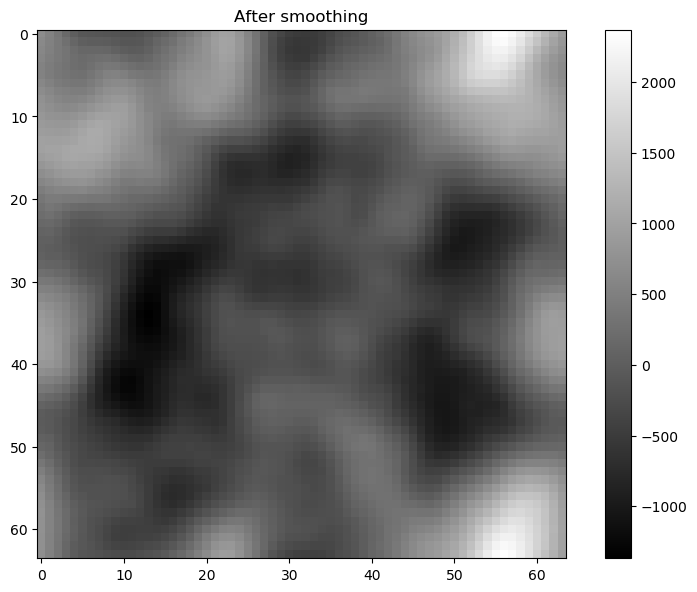

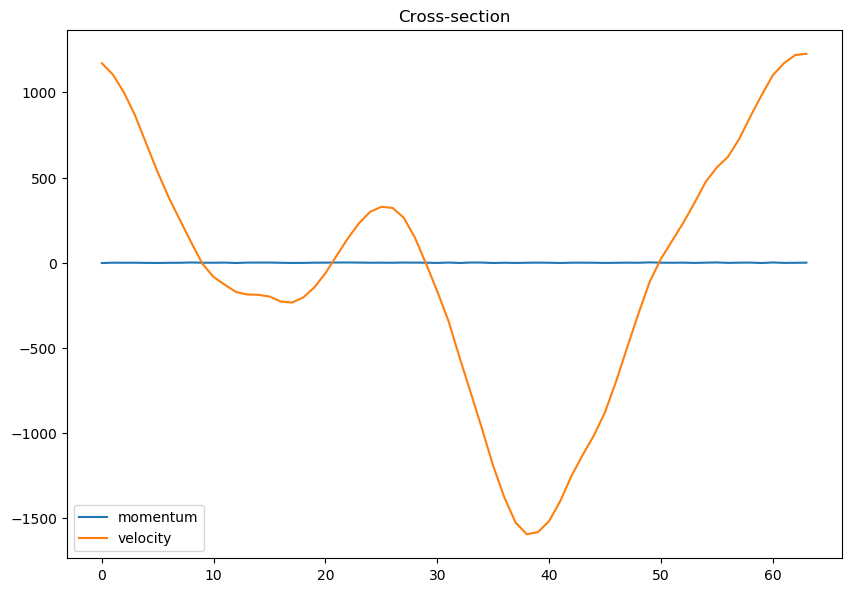

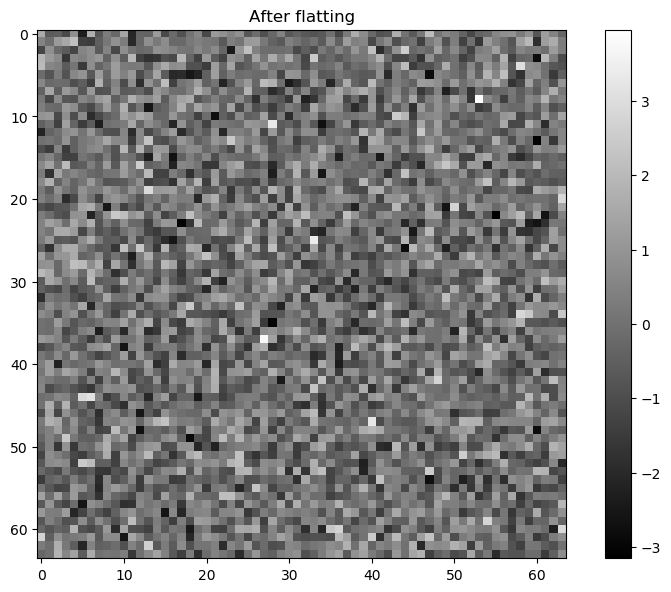

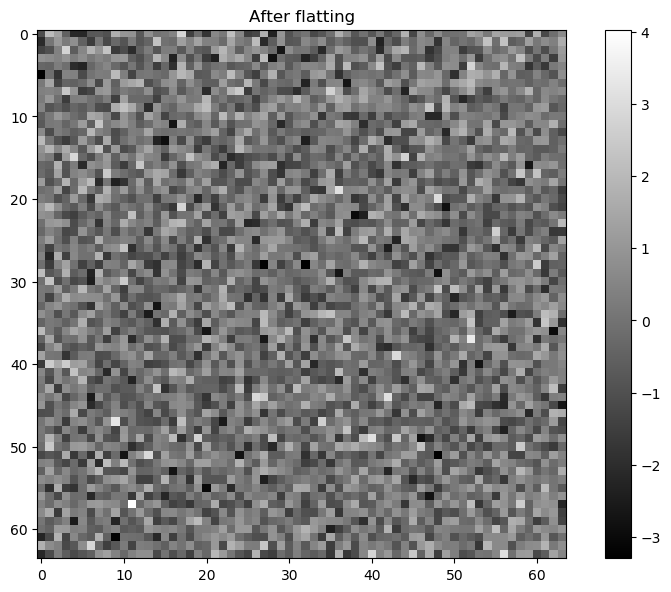

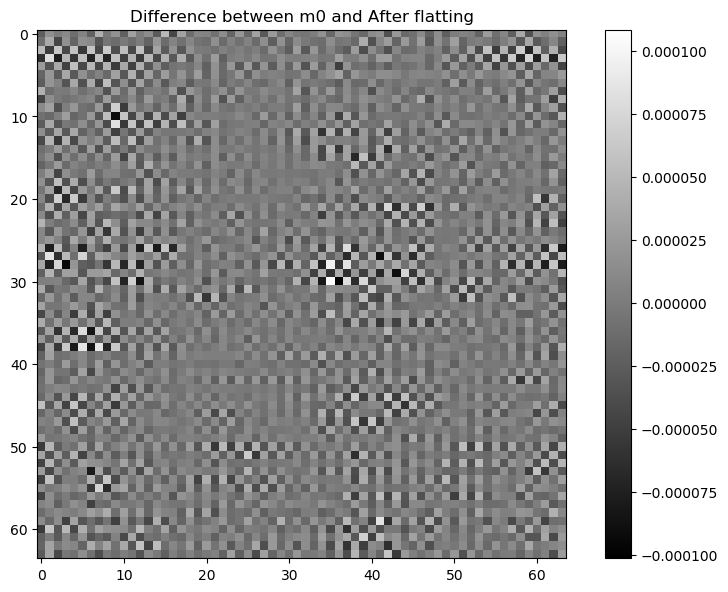

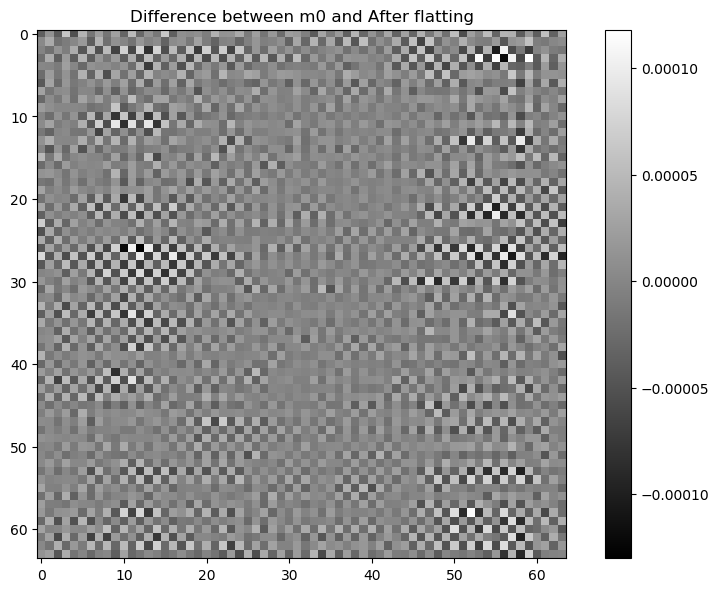

In [4]:
# Now create a random vector field and smooth it to see if we notice a difference
from pycuda import gpuarray, curandom
import pycuda.autoinit
import numpy as np
alpha=0.1
beta=0.01
gamma=.01
np.random.seed(1)
defshape = lm.imshape2defshape(source.shape)
#xh = np.ones(defshape).astype(np.float32)
xh = np.random.randn(*defshape).astype(np.float32)
#xh = np.zeros(defshape, dtype=np.float32);xh[:,:, width//2, width//2] = 1
m0 = gpuarray.to_gpu(np.ascontiguousarray(xh))
for d in range(2):
    plt.figure()
    plt.imshow(xh[0,d,...], cmap='gray')
    plt.title('Before smoothing')
    plt.colorbar()
metric = lm.FluidMetric(alpha=alpha, beta=beta, gamma=gamma, shape=m0.shape, precision='single')
v0 = metric.sharp(m0)
#v0 = metric.sharp(v0)
for d in range(2):
    plt.figure()
    plt.imshow(v0[0,d,...].get(), cmap='gray')
    plt.title('After smoothing')
    plt.colorbar()
plt.figure()
plt.plot(xh[0,0,width//2,:], label='momentum')
plt.plot(v0.get()[0,0,width//2,:], label='velocity')
plt.legend()
_=plt.title('Cross-section')
vf = metric.flat(v0)
for d in range(2):
    plt.figure()
    plt.imshow(vf[0,d,...].get(), cmap='gray')
    plt.title('After flatting')
    plt.colorbar()
for d in range(2):
    plt.figure()
    plt.imshow((vf-m0)[0,d,...].get(), cmap='gray')
    plt.title('Difference between m0 and After flatting')
    plt.colorbar()